In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import json
from collections import defaultdict
import seaborn as sns
import ast

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !git clone https://github.com/Ukrys/IS5126-Grp-hw.git


In [7]:
# We need the following code block if we are importing modules or working with data files from current working directiory

# For Google Colab
# Upload the folder containing this file to google drive.
# Make sure that uninformed_informed_search.py is also in the same folder in google drive.
import sys, os

# Checking if the notebook is opened in google colab
#If YES, mount the google drive and change the directory
if 'google.colab' in sys.modules:

    # mount google drive
    from google.colab import drive
    drive.mount('/content/drive')

    # change path to the folder
    path = '/content/drive/My Drive/Colab Notebooks/IS5126-Grp-hw/data'
    print(path)
    #os.chdir changes the current working directory
    os.chdir(path)
    !pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/IS5126-Grp-hw/data
/content/drive/My Drive/Colab Notebooks/IS5126-Grp-hw/data


In [36]:
import os
import json
from collections import defaultdict
from datetime import datetime

# folder_path = '/Users/bvnosssssv/Documents/GitHub/IS5126-Grp-hw/data/traffic_flow'
folder_path='traffic_flow'

traffic_list=[]

for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, 'r') as f:
            data = json.load(f)
        value_data = data['value']
        last_updated_time = data['lastUpdatedTime']

        df = pd.DataFrame(value_data)
        df['lastUpdatedTime'] = last_updated_time
        traffic_list.append(df)

final_traffic = pd.concat(traffic_list, ignore_index=True)
final_traffic


,LinkID,RoadName,RoadCategory,SpeedBand,MinimumSpeed,MaximumSpeed,StartLon,StartLat,EndLon,EndLat,lastUpdatedTime
0,103000000,KENT ROAD,E,4,30,39,103.85298052044503,1.3170142376560023,103.85259882242372,1.3166840028663076,2024-10-05 15:15:00
1,103000010,BUCKLEY ROAD,E,3,20,29,103.84102305136321,1.3166507852203482,103.84022564204443,1.316912438354752,2024-10-05 15:15:00
2,103000011,BUCKLEY ROAD,E,8,70,999,103.84022564204443,1.316912438354752,103.84102305136321,1.3166507852203482,2024-10-05 15:15:00
3,103000014,SHREWSBURY ROAD,E,5,40,49,103.84700267615683,1.3186726294030418,103.84711392225329,1.3180212058893457,2024-10-05 15:15:00
4,103000015,SHREWSBURY ROAD,E,5,40,49,103.84711392225329,1.3180212058893457,103.84700267615683,1.3186726294030418,2024-10-05 15:15:00
...,...,...,...,...,...,...,...,...,...,...,...
273495,103001218,DRAYCOTT DRIVE,D,2,10,19,103.83110989321554,1.3096279339357806,103.83119447352243,1.309694857000047,2024-10-04 18:10:00
273496,103001219,DRAYCOTT DRIVE,D,4,30,39,103.83119447352243,1.309694857000047,103.83110989321554,1.3096279339357806,2024-10-04 18:10:00
273497,103001226,PADANG JERINGAU,D,5,40,49,103.86554520014256,1.3099051585628567,103.86611733337693,1.309253800591554,2024-10-04 18:10:00
273498,103001227,PADANG JERINGAU,D,4,30,39,103.86611733337693,1.309253800591554,103.86554520014256,1.3099051585628567,2024-10-04 18:10:00


In [52]:
final_traffic['lastUpdatedTime'] = final_traffic['lastUpdatedTime'].apply(lambda x: datetime.fromisoformat(x))

In [37]:
# folder_path = '/Users/bvnosssssv/Documents/GitHub/IS5126-Grp-hw/data/pt'
folder_path='pt'

pt_list=[]

for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, 'r') as f:
            data = json.load(f)['data']['items'][0]
        value_data = data['readings']
        last_updated_time = data['updatedTimestamp']

        df = pd.DataFrame(value_data).reset_index(names='region')
        df['lastUpdatedTime'] = datetime.fromisoformat(last_updated_time).replace(second=0, microsecond=0)
        pt_list.append(df)

final_pt = pd.concat(pt_list, ignore_index=True)
final_pt

,region,o3_sub_index,no2_one_hour_max,o3_eight_hour_max,psi_twenty_four_hourly,pm10_twenty_four_hourly,pm10_sub_index,pm25_twenty_four_hourly,so2_sub_index,pm25_sub_index,so2_twenty_four_hourly,co_eight_hour_max,co_sub_index,lastUpdatedTime
0,west,7,30,16,59,28,28,20,5,59,7,0,4,2024-10-05 00:45:00+08:00
1,east,15,30,35,52,35,35,13,3,52,4,1,6,2024-10-05 00:45:00+08:00
2,central,15,65,36,62,39,39,22,2,62,4,1,5,2024-10-05 00:45:00+08:00
3,south,8,21,18,54,24,24,15,3,54,5,0,4,2024-10-05 00:45:00+08:00
4,north,9,59,21,57,32,32,17,1,57,2,1,9,2024-10-05 00:45:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,west,7,46,17,52,19,19,13,4,52,6,0,4,2024-10-05 21:00:00+08:00
496,east,12,42,28,38,22,22,9,5,38,8,1,6,2024-10-05 21:00:00+08:00
497,central,16,61,37,56,29,29,17,5,56,9,0,4,2024-10-05 21:00:00+08:00
498,south,7,23,16,49,17,17,12,4,49,7,0,3,2024-10-05 21:00:00+08:00


In [38]:
# folder_path = '/Users/bvnosssssv/Documents/GitHub/IS5126-Grp-hw/data/pt'

center_data=[]
# center for regions
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, 'r') as f:
            data = json.load(f)['data']['regionMetadata']
            data2 = [(item['name'], item['labelLocation']['latitude'], item['labelLocation']['longitude']) for item in data]

    break
center_df = pd.DataFrame(data2, columns=['region', 'latitude', 'longitude'])
center_df

,region,latitude,longitude
0,west,1.35735,103.70
1,east,1.35735,103.94
2,central,1.35735,103.82
3,south,1.29587,103.82
4,north,1.41803,103.82


In [39]:
center_df[['latitude',	'longitude']].values.tolist()

[[1.35735, 103.7],
 [1.35735, 103.94],
 [1.35735, 103.82],
 [1.29587, 103.82],
 [1.41803, 103.82]]

In [40]:
final_pt.columns

Index(['region', 'o3_sub_index', 'no2_one_hour_max', 'o3_eight_hour_max',
       'psi_twenty_four_hourly', 'pm10_twenty_four_hourly', 'pm10_sub_index',
       'pm25_twenty_four_hourly', 'so2_sub_index', 'pm25_sub_index',
       'so2_twenty_four_hourly', 'co_eight_hour_max', 'co_sub_index',
       'lastUpdatedTime'],
      dtype='object')

In [41]:
final_traffic_labeled = final_traffic[['LinkID', 'StartLon', 'StartLat', 'EndLon', 'EndLat']]

final_traffic_labeled['StartLon'] = pd.to_numeric(final_traffic_labeled['StartLon'], errors='coerce')
final_traffic_labeled['EndLon'] = pd.to_numeric(final_traffic_labeled['EndLon'], errors='coerce')
final_traffic_labeled['StartLat'] = pd.to_numeric(final_traffic_labeled['StartLat'], errors='coerce')
final_traffic_labeled['EndLat'] = pd.to_numeric(final_traffic_labeled['EndLat'], errors='coerce')

final_traffic_labeled['Longitude'] = (final_traffic_labeled['StartLon'] + final_traffic_labeled['EndLon']) / 2
final_traffic_labeled['Latitude'] = (final_traffic_labeled['StartLat'] + final_traffic_labeled['EndLat']) / 2

final_traffic_labeled.drop_duplicates(inplace=True)


# final_traffic.to_csv("final_traffic.csv")
# final_pt.to_csv("final_pt.csv")
# center_df.to_csv("center_df.csv")
# final_traffic_labeled.to_csv('final_traffic_labeled.csv')

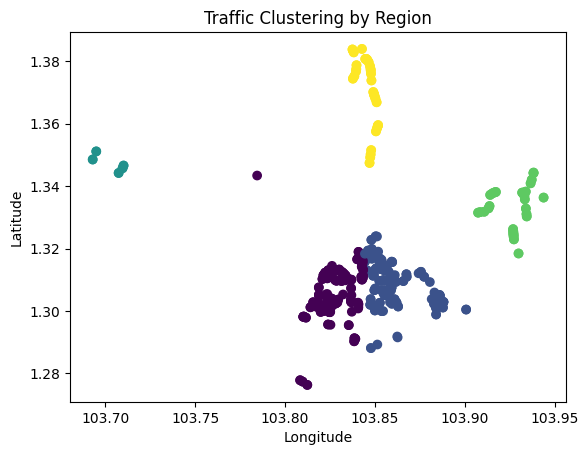

In [42]:

# longitude and latitude range of SG
latitude = [103.38, 104,6]
longitude = [1.09, 1.29]

# initial centers
initial_centers = center_df[['latitude','longitude']].values.tolist()
# initial_centers = [
#     [1.35735, 103.7],   # 0: west
#     [1.35735, 103.94],  # 1: east
#     [1.35735, 103.82],  # 2: central
#     [1.29587, 103.82],  # 3: south
#     [1.41803, 103.82]   # 4: north
# ]

# Clustering using Kmeans
kmeans = KMeans(n_clusters=5, init=initial_centers, n_init=1)
final_traffic_labeled['region'] = kmeans.fit_predict(final_traffic_labeled[['Longitude', 'Latitude']])

# Visualization
plt.scatter(final_traffic_labeled['Longitude'], final_traffic_labeled['Latitude'], c=final_traffic_labeled['region'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Clustering by Region')
plt.show()

****

In [43]:
region_mapping = {
    0: 'west',
    1: 'east',
    2: 'central',
    3: 'south',
    4: 'north'
}

final_traffic_labeled['region'] = final_traffic_labeled['region'].replace(region_mapping)
final_traffic=pd.merge(final_traffic, final_traffic_labeled[['LinkID','Longitude', 'Latitude','region']], on='LinkID', how='left')

In [44]:
final_traffic.columns

Index(['LinkID', 'RoadName', 'RoadCategory', 'SpeedBand', 'MinimumSpeed',
       'MaximumSpeed', 'StartLon', 'StartLat', 'EndLon', 'EndLat',
       'lastUpdatedTime', 'Longitude', 'Latitude', 'region'],
      dtype='object')

In [48]:
final_traffic['lastUpdatedTime'][0]

'2024-10-05 15:15:00'

In [46]:
final_pt.columns

Index(['region', 'o3_sub_index', 'no2_one_hour_max', 'o3_eight_hour_max',
       'psi_twenty_four_hourly', 'pm10_twenty_four_hourly', 'pm10_sub_index',
       'pm25_twenty_four_hourly', 'so2_sub_index', 'pm25_sub_index',
       'so2_twenty_four_hourly', 'co_eight_hour_max', 'co_sub_index',
       'lastUpdatedTime'],
      dtype='object')

In [70]:
# 将两列都移除时区信息
final_traffic['lastUpdatedTime'] = pd.to_datetime(final_traffic['lastUpdatedTime']).dt.tz_localize(None)
final_pt['lastUpdatedTime'] = pd.to_datetime(final_pt['lastUpdatedTime']).dt.tz_localize(None)

In [71]:
final_traffic_groupbyregion=final_traffic.groupby(['region','lastUpdatedTime'])['SpeedBand'].mean().reset_index()
final_traffic_groupbyregion

,region,lastUpdatedTime,SpeedBand
0,central,2024-10-04 11:00:00,4.900000
1,central,2024-10-04 11:05:00,4.600000
2,central,2024-10-04 11:10:00,4.700000
3,central,2024-10-04 11:15:00,4.600000
4,central,2024-10-04 11:20:00,5.100000
...,...,...,...
2730,west,2024-10-06 09:45:00,4.167513
2731,west,2024-10-06 09:50:00,4.126904
2732,west,2024-10-06 09:55:00,4.177665
2733,west,2024-10-06 10:00:00,4.050761


In [72]:
# 进行合并
traffic_pt = pd.merge(final_traffic_groupbyregion, final_pt, on=['lastUpdatedTime', 'region'], how='inner')
traffic_pt.iloc[:,0:15]

,region,lastUpdatedTime,SpeedBand,o3_sub_index,no2_one_hour_max,o3_eight_hour_max,psi_twenty_four_hourly,pm10_twenty_four_hourly,pm10_sub_index,pm25_twenty_four_hourly,so2_sub_index,pm25_sub_index,so2_twenty_four_hourly,co_eight_hour_max,co_sub_index
0,central,2024-10-05 00:45:00,5.400000,15,65,36,62,39,39,22,2,62,4,1,5
1,central,2024-10-05 01:00:00,5.500000,10,62,23,62,38,38,22,2,62,4,1,5
2,central,2024-10-05 01:15:00,5.300000,10,62,23,62,38,38,22,2,62,4,1,5
3,central,2024-10-05 01:30:00,5.500000,10,62,23,62,38,38,22,2,62,4,1,5
4,central,2024-10-05 01:45:00,5.600000,10,62,23,62,38,38,22,2,62,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,west,2024-10-06 00:45:00,4.263959,5,28,11,52,19,19,13,4,52,6,0,4
436,west,2024-10-06 01:00:00,4.421320,4,29,9,52,19,19,13,4,52,6,0,5
437,west,2024-10-06 01:15:00,4.487310,4,29,9,52,19,19,13,4,52,6,0,5
438,west,2024-10-06 01:30:00,4.482234,4,29,9,52,19,19,13,4,52,6,0,5


In [ ]:
set(traffic_pt.lastUpdatedTime)

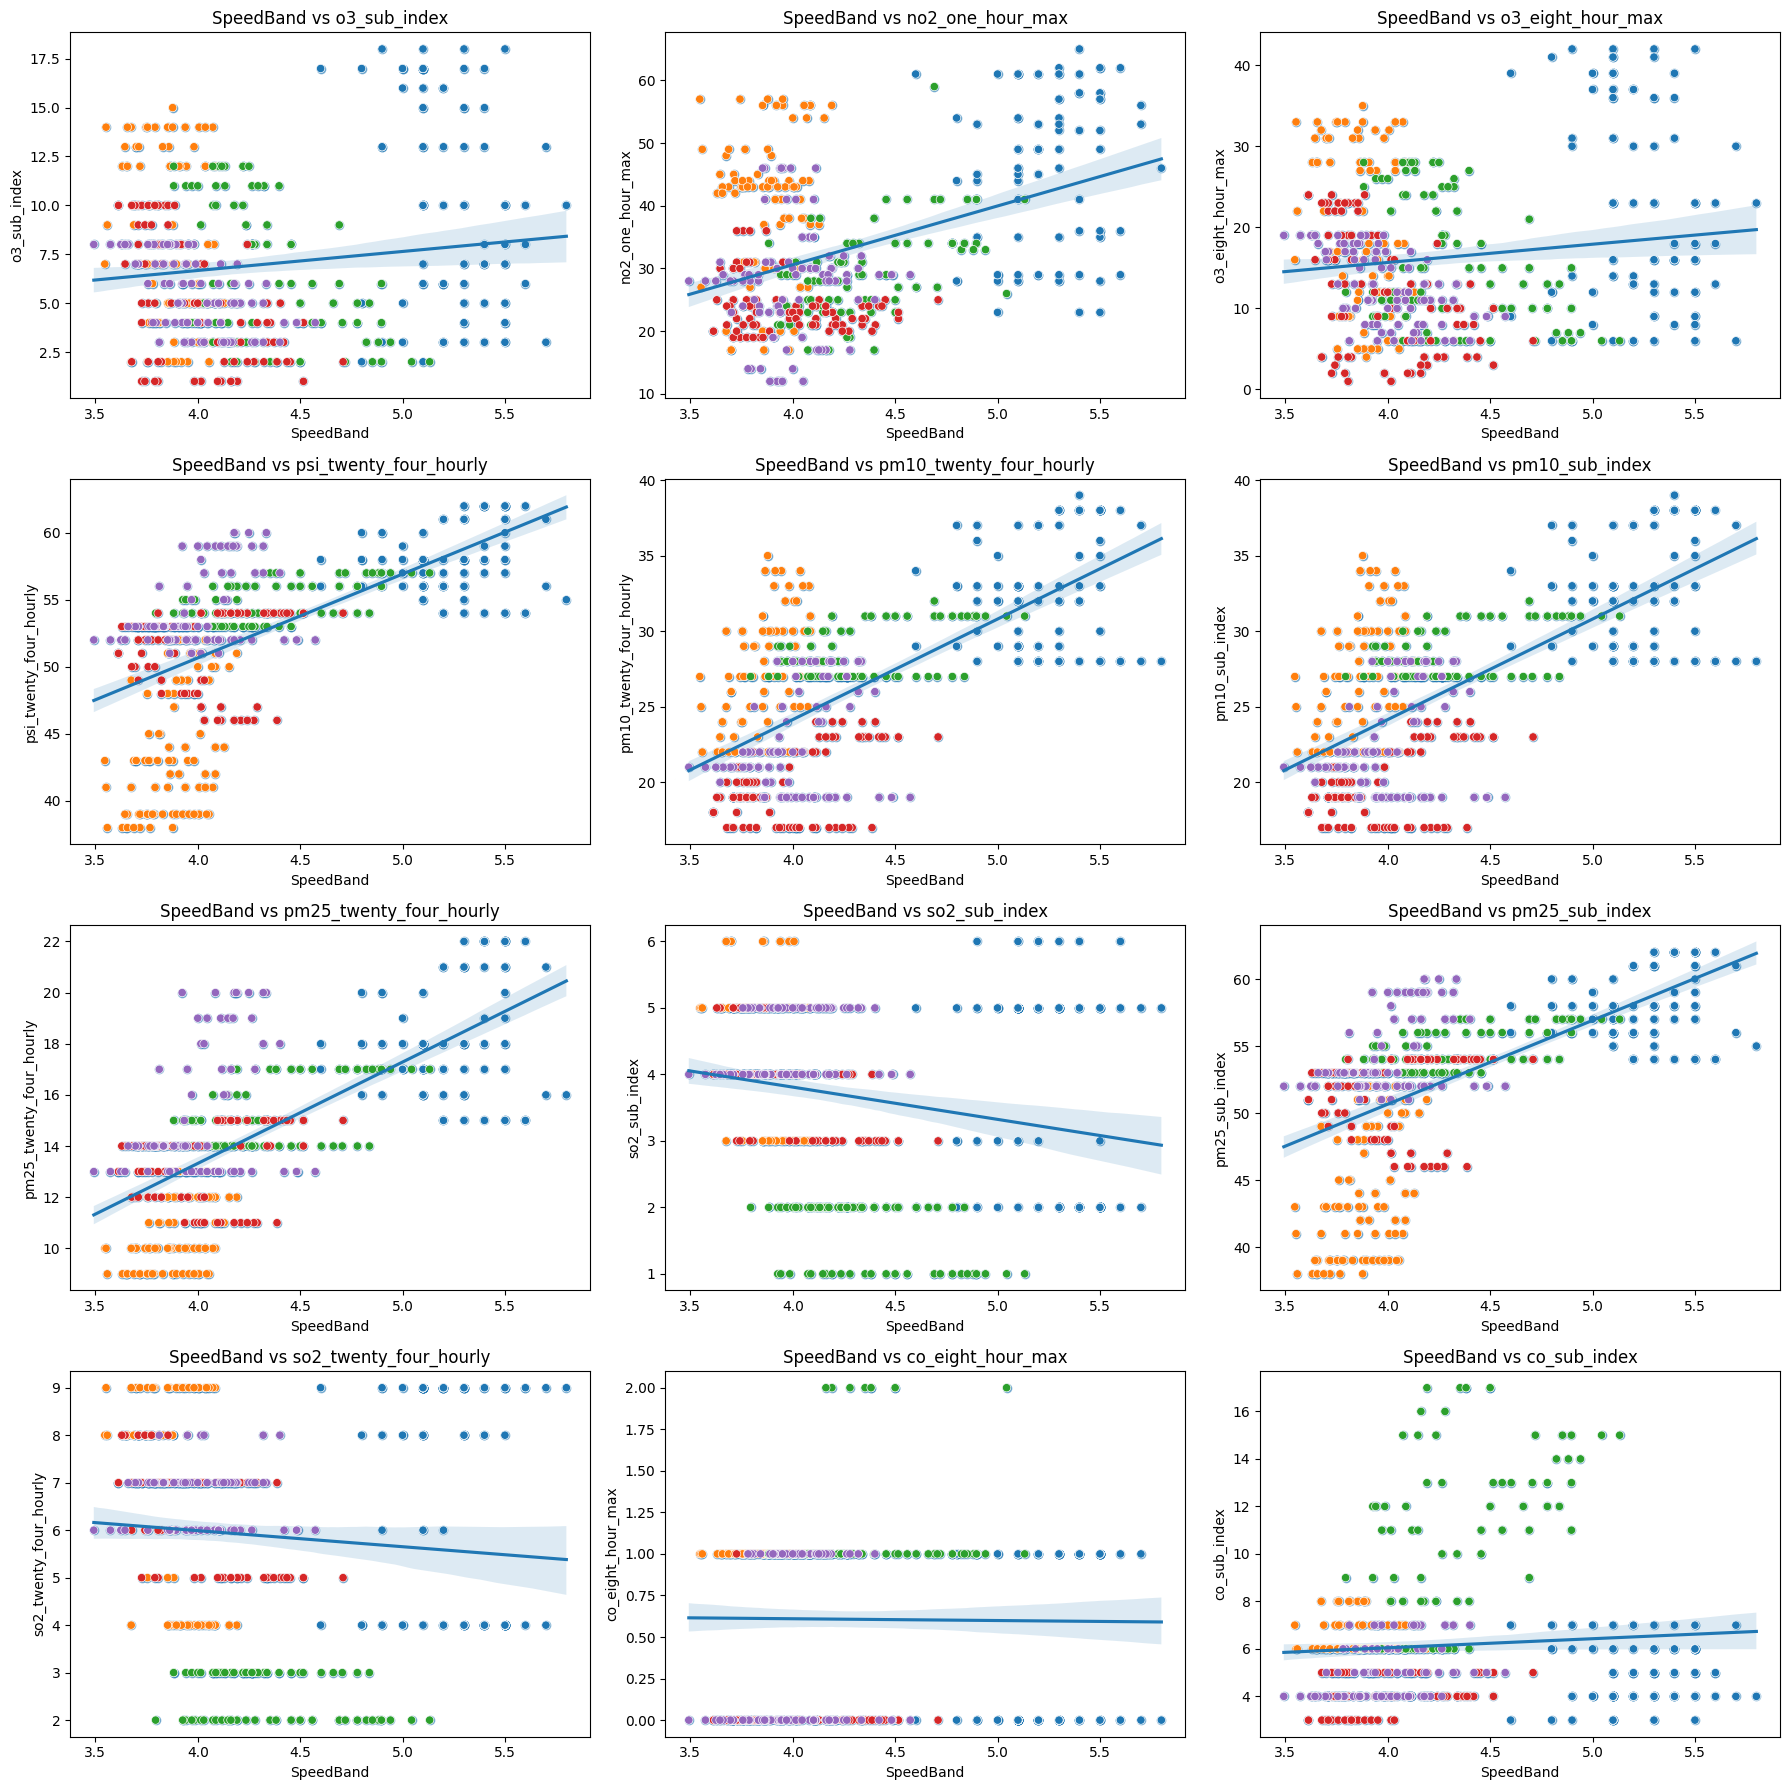

o3_sub_index: R² = 0.02
no2_one_hour_max: R² = 0.18
o3_eight_hour_max: R² = 0.02
psi_twenty_four_hourly: R² = 0.38
pm10_twenty_four_hourly: R² = 0.44
pm10_sub_index: R² = 0.44
pm25_twenty_four_hourly: R² = 0.50
so2_sub_index: R² = 0.04
pm25_sub_index: R² = 0.38
so2_twenty_four_hourly: R² = 0.01
co_eight_hour_max: R² = 0.00
co_sub_index: R² = 0.01


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 列出你所有的 y 变量
y_vars = [
    'o3_sub_index', 'no2_one_hour_max', 'o3_eight_hour_max', 'psi_twenty_four_hourly',
    'pm10_twenty_four_hourly', 'pm10_sub_index', 'pm25_twenty_four_hourly',
    'so2_sub_index', 'pm25_sub_index', 'so2_twenty_four_hourly',
    'co_eight_hour_max', 'co_sub_index'
]

r2_values = {}

# 创建子图来显示每个变量的回归结果
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))
axes = axes.flatten()

# 遍历每个 y 变量，绘制回归图
for i, y in enumerate(y_vars):
    X = traffic_pt[['SpeedBand']]
    y_data = traffic_pt[y]

    # 进行线性回归
    model = LinearRegression()
    model.fit(X, y_data)

    # 预测 y 值
    y_pred = model.predict(X)

    # 计算 R² 值
    r2 = r2_score(y_data, y_pred)
    r2_values[y] = r2  # 存储 R² 值

    sns.regplot(
        x='SpeedBand', y=y, data=traffic_pt, ax=axes[i], scatter_kws={'alpha':0.5}
    )
    # 在回归图中添加 region 的标签
    axes[i].set_title(f"SpeedBand vs {y}")
    sns.scatterplot(x='SpeedBand', y=y, hue='region', data=traffic_pt, ax=axes[i], legend=False)

# 调整布局
plt.tight_layout()
plt.show()

# 输出每个变量的 R² 值
for var, r2 in r2_values.items():
    print(f"{var}: R² = {r2:.2f}")